# Neural network example

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Prepering data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape
train_images[0, 23, 23]
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

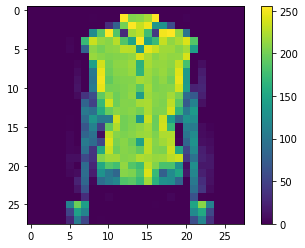

In [5]:
plt.figure()
plt.imshow(train_images[76])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Creating and training model

In [7]:
# Creting model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [8]:
# Training the model
model.fit(train_images, train_labels, epochs=1, use_multiprocessing=True)


1875/1875 [==============================] - 1s 611us/step - loss: 0.4999 - accuracy: 0.8245


## Evaluation

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test acuracy:', test_acc)

313/313 [==============================] - 0s 425us/step - loss: 0.4244 - accuracy: 0.8493
Test acuracy: 0.8493000268936157


Pullover


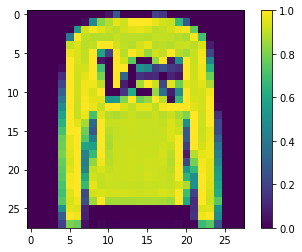

In [10]:
predicitions = model.predict(test_images)
print(class_names[np.argmax(predicitions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
""" a show off loop
plt.ion()
for i in range(test_images.shape[0]):
    print(class_names[np.argmax(predicitions[i])])
    plt.figure()
    plt.imshow(test_images[i])
    plt.show()
    time.sleep(2)
    clear_output()
    plt.close()
"""


' a show off loop\nplt.ion()\nfor i in range(test_images.shape[0]):\n    print(class_names[np.argmax(predicitions[i])])\n    plt.figure()\n    plt.imshow(test_images[i])\n    plt.show()\n    time.sleep(2)\n    clear_output()\n    plt.close()\n'

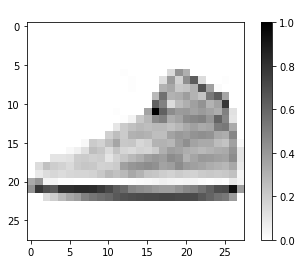

In [12]:
COLOR = 'BLACk'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)